In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x800 with 0 Axes>

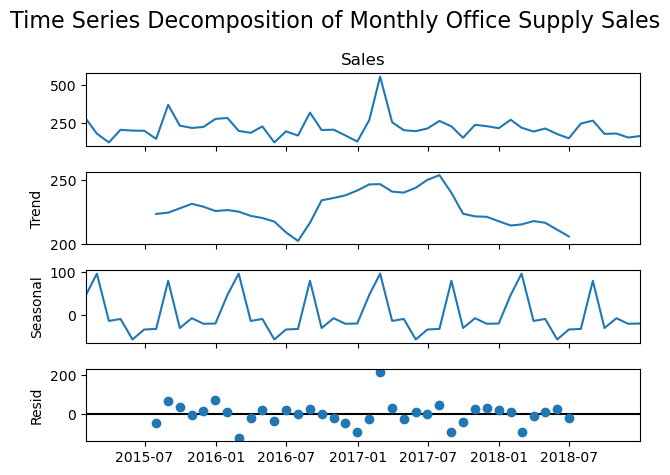

In [5]:
# Load the dataset
df = pd.read_csv("cleaned_sales_data.csv")

# Convert 'Order Date' to datetime format and set as index
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Aggregate daily sales and resample to monthly average for decomposition
df_monthly = df['Sales'].resample('M').mean()

# Drop any missing values
df_monthly.dropna(inplace=True)

# Decompose the series
decomposition = seasonal_decompose(df_monthly, model='additive')  # Use model='multiplicative' if necessary

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Time Series Decomposition of Monthly Office Supply Sales", fontsize=16)
plt.tight_layout()
plt.show()